In [11]:
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
import pydotplus
import collections

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X = iris.iloc[:,:3]
Y = iris[['species']]

In [5]:
Y = Y['species'].apply(lambda s: 1 if s =='setosa' else 2 if s=='versicolor' else 3)
pd.DataFrame(Y).groupby('species').size()

species
1    50
2    50
3    50
dtype: int64

In [12]:
train_x, test_x, train_y, test_y = train_test_split(X, Y)
ml = tree.DecisionTreeClassifier().fit(train_x, train_y)
pred_test_y = ml.predict(test_x)
sum(test_y == pred_test_y)/len(test_y)

0.9210526315789473

In [15]:
dot_data = tree.export_graphviz(ml, feature_names=X.columns ,\
            out_file = None, filled = True, rounded = True)

graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('red','orange')
edges = collections.defaultdict(list)
# 시각화를 위한 전작업이 완료되었다. 

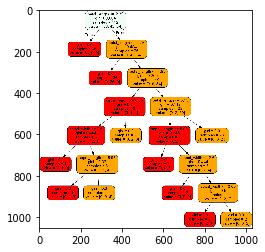

In [16]:
for i in graph.get_edge_list() :
    edges[i.get_source()].append(int(i.get_destination()))
    
for i in edges : 
    edges[i].sort()
    for a in range(2) : 
        dest = graph.get_node(str(edges[i][a]))[0]
        dest.set_fillcolor(colors[a])
        
graph.write_png('tree.png') # 이미지 저장


#그럼 이미지를 가져와보자. 
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
img = imread('tree.png')
plt.imshow(img)

plt.show()